**a. Fit a logistic regression model to predict Default using given dataset.**

In [28]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


data=pd.read_csv('Default.csv')
data.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
label_encoder=LabelEncoder()
data['default']=label_encoder.fit_transform(data['default'])
data['student']=label_encoder.fit_transform(data['student'])
data.head()

,Unnamed: 0,default,student,balance,income
0,1,0,0,729.526495,44361.625074
1,2,0,1,817.180407,12106.134700
2,3,0,0,1073.549164,31767.138947
3,4,0,0,529.250605,35704.493935
4,5,0,0,785.655883,38463.495879


In [8]:
x=data['balance'].values.reshape(-1,1)
y=data['default'].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)
logisticreg=LogisticRegression(class_weight='balanced')
logreg=logisticreg.fit(x,y)

y_pred = logreg.predict(x_test)
print("Predicted Values:",y_pred[0:10])#first 10 values

Predicted Values: [0 1 0 0 0 0 0 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**b. Demonstrate prediction for some values.**

In [14]:
check=logreg.predict([[729.526495]])

print(check)

[0]


**Confusion Matrix**

[[2501  387]
 [  12  100]]


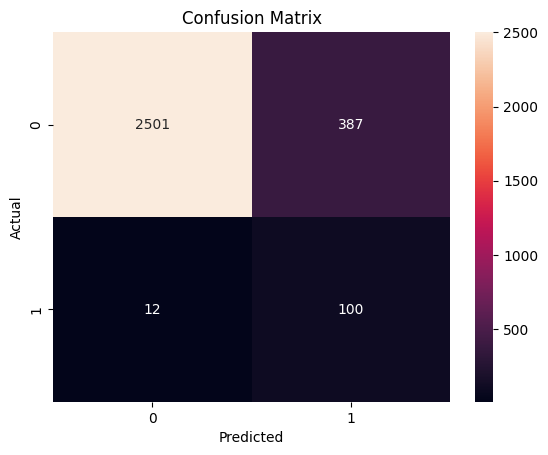

In [23]:
conf=confusion_matrix(y_test,y_pred)
print(conf)

sns.heatmap(conf,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Accuracy Score**

In [30]:
print("Accuracy Score:",100*accuracy_score(y_test,y_pred))

print("Classification Report:","\n",classification_report(y_test,y_pred))

Accuracy Score: 86.7
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      2888
           1       0.21      0.89      0.33       112

    accuracy                           0.87      3000
   macro avg       0.60      0.88      0.63      3000
weighted avg       0.97      0.87      0.90      3000

